### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [1]:
import tensorflow as tf
tf.set_random_seed(42)

C:\Users\neeha\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
tf.__version__

'1.13.1'

### Collect Data

In [5]:
import keras

In [33]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [34]:
testX.shape

(10000, 28, 28)

In [35]:
testY.shape

(10000,)

In [36]:
trainX.shape

(60000, 28, 28)

In [37]:
trainY.shape

(60000,)

In [38]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [39]:
trainY_cat=tf.keras.utils.to_categorical(
    trainY,
    num_classes=None,
    dtype='float32'
)

In [71]:
trainY_cat.shape

(60000, 10)

In [41]:
testY_cat=tf.keras.utils.to_categorical(
    testY,
    num_classes=None,
    dtype='float32'
)

In [72]:
testY_cat.shape

(10000, 10)

In [52]:
print(trainY_cat.shape)
print('First 5 examples now are: ', trainY_cat[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

In [44]:
import matplotlib.pyplot as plt

In [45]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [46]:
trainX = trainX / 255.0

testX = testX / 255.0

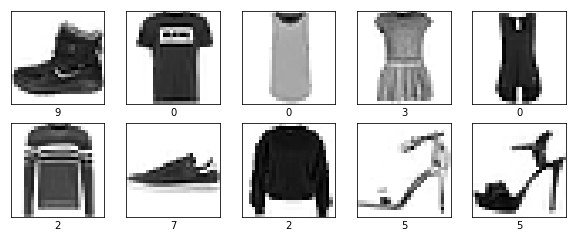

In [53]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    plt.xlabel(trainY[i])
plt.show()

### Or We can use Real Names as per the class labels

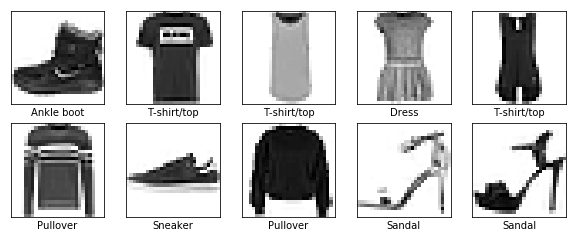

In [54]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[trainY[i]])
plt.show()

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [56]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
# create first model
model = Sequential()


In [75]:
X_train = trainX.reshape(60000, 784)
X_test = testX.reshape(10000, 784)
#X_train = trainX.astype('float32')
#X_test = testX.astype('float32')

In [76]:
X_train.shape

(60000, 784)

In [77]:
# creating the model and adding the output layer
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(10,input_shape=[784,]))

In [78]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

### Execute the model using model.fit()

In [82]:
scores = model.fit(X_train,trainY_cat,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 3s 53us/sample - loss: 10.3357 - acc: 0.1210
Epoch 2/10
60000/60000 [==============================] - 3s 53us/sample - loss: 10.3357 - acc: 0.1210
Epoch 3/10
60000/60000 [==============================] - 3s 53us/sample - loss: 10.3357 - acc: 0.1210
Epoch 4/10
60000/60000 [==============================] - 3s 53us/sample - loss: 10.3357 - acc: 0.1210
Epoch 5/10
60000/60000 [==============================] - 3s 52us/sample - loss: 10.3357 - acc: 0.1210
Epoch 6/10
60000/60000 [==============================] - 3s 53us/sample - loss: 10.3357 - acc: 0.1210
Epoch 7/10
60000/60000 [==============================] - 3s 52us/sample - loss: 10.3357 - acc: 0.1210
Epoch 8/10
60000/60000 [==============================] - 3s 52us/sample - loss: 10.3357 - acc: 0.1210
Epoch 9/10
60000/60000 [==============================] - 3s 51us/sample - loss: 10.3357 - acc: 0.1210
Epoch 10/10
60000/60000 [==============================] - 3s 52us/sample

In [84]:
scores = model.evaluate(X_test,testY_cat,verbose = 2)

 - 0s - loss: 10.2334 - acc: 0.1209


In [85]:
print("Test Loss", scores)

Test Loss [10.233413232421874, 0.1209]


### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [96]:
# creating the model and adding the output layer
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.BatchNormalization(input_shape=[784,]))
model.add(tf.keras.layers.Dense(10,input_shape=[784,]))


In [97]:
model.compile(loss='categorical_crossentropy', optimizer='sgd')#, metrics=['accuracy'])

### Execute the model

In [98]:
scores_normal = model.fit(X_train,trainY_cat,epochs=10)
scores_normal = model.evaluate(X_test,testY_cat,verbose = 2)
print("Test Loss", scores_normal)

Epoch 1/10
60000/60000 [==============================] - 4s 73us/sample - loss: 6.3765
Epoch 2/10
60000/60000 [==============================] - 4s 64us/sample - loss: 4.3204
Epoch 3/10
60000/60000 [==============================] - 4s 63us/sample - loss: 3.1429
Epoch 4/10
60000/60000 [==============================] - 4s 64us/sample - loss: 2.9577
Epoch 5/10
60000/60000 [==============================] - 4s 64us/sample - loss: 2.9409
Epoch 6/10
60000/60000 [==============================] - 4s 64us/sample - loss: 2.9532
Epoch 7/10
60000/60000 [==============================] - 4s 64us/sample - loss: 2.9623
Epoch 8/10
60000/60000 [==============================] - 4s 65us/sample - loss: 2.8899
Epoch 9/10
60000/60000 [==============================] - 4s 64us/sample - loss: 2.8670
Epoch 10/10
60000/60000 [==============================] - 4s 64us/sample - loss: 2.7878
 - 0s - loss: 2.5836
Test Loss 2.5836392990112307


### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [101]:
# creating the model and adding the output layer
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.BatchNormalization(input_shape=[784,]))
model.add(tf.keras.layers.Dense(10,input_shape=[784,]))
sgd = tf.keras.optimizers.SGD(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer='sgd')

In [102]:
scores_lr = model.fit(X_train,trainY_cat,epochs=10)
scores_lr = model.evaluate(X_test,testY_cat,verbose = 2)
print("Test Loss", scores_lr)

Epoch 1/10
60000/60000 [==============================] - 5s 76us/sample - loss: 6.1393
Epoch 2/10
60000/60000 [==============================] - 4s 66us/sample - loss: 7.6112
Epoch 3/10
60000/60000 [==============================] - 4s 66us/sample - loss: 7.0162
Epoch 4/10
60000/60000 [==============================] - 4s 65us/sample - loss: 6.4593
Epoch 5/10
60000/60000 [==============================] - 4s 65us/sample - loss: 6.4220
Epoch 6/10
60000/60000 [==============================] - 4s 66us/sample - loss: 6.3323
Epoch 7/10
60000/60000 [==============================] - 4s 66us/sample - loss: 6.2555
Epoch 8/10
60000/60000 [==============================] - 4s 66us/sample - loss: 6.1237
Epoch 9/10
60000/60000 [==============================] - 4s 65us/sample - loss: 6.0588
Epoch 10/10
60000/60000 [==============================] - 4s 66us/sample - loss: 6.0349
 - 1s - loss: 5.9057
Test Loss 5.905729970550537


### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [108]:
# creating the model and adding the output layer
model = tf.keras.models.Sequential()

#1st hidden layer
model.add(tf.keras.layers.Dense(100,input_shape=[784,],activation='sigmoid'))
#2st hidden layer
model.add(tf.keras.layers.Dense(100,activation='sigmoid'))
#3rs Dense and Output Layer
model.add(tf.keras.layers.Dense(10,activation='softmax'))
sgd = tf.keras.optimizers.SGD(lr=0.03)
model.compile(loss='categorical_crossentropy', optimizer='sgd')

In [109]:
scores_lr3 = model.fit(X_train,trainY_cat,epochs=10)
scores_lr3 = model.evaluate(X_test,testY_cat,verbose = 2)

Epoch 1/10
60000/60000 [==============================] - 6s 99us/sample - loss: 2.0801
Epoch 2/10
60000/60000 [==============================] - 5s 85us/sample - loss: 1.4140
Epoch 3/10
60000/60000 [==============================] - 5s 83us/sample - loss: 1.0396
Epoch 4/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.8580
Epoch 5/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.7574
Epoch 6/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.6953
Epoch 7/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.6534
Epoch 8/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.6225
Epoch 9/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.5984
Epoch 10/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.5778
 - 1s - loss: 0.5881


## Review model

In [110]:
print("Test Loss", scores_lr3)

Test Loss 0.5880534406661987


### Run the model

Model already Run in the above steps